# 1. Построить гистограммы

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
c = pd.read_csv('train.csv')

In [52]:
c.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


In [ ]:
lst = pd.concat([c["A"], c["T"], c["G"], c["C"]]).dropna().tolist()
# concatenating necessary data, dropping NAs and converting to a list

Text(0.5, 1.0, 'Distribution of all 4 positions together')

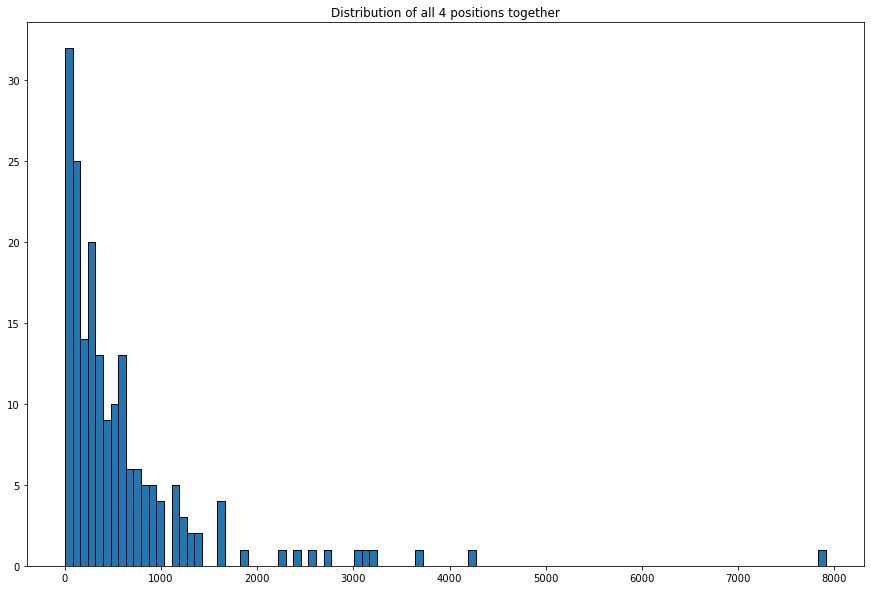

In [158]:
plt.figure(figsize=(15, 10))
plt.hist(lst, bins=100, edgecolor='black'); # plotting histogram
plt.title("Distribution of all 4 positions together")

In [148]:
lstA = c["A"].dropna().tolist()
lstT = c["T"].dropna().tolist()
lstC = c["C"].dropna().tolist()
lstG = c["G"].dropna().tolist()

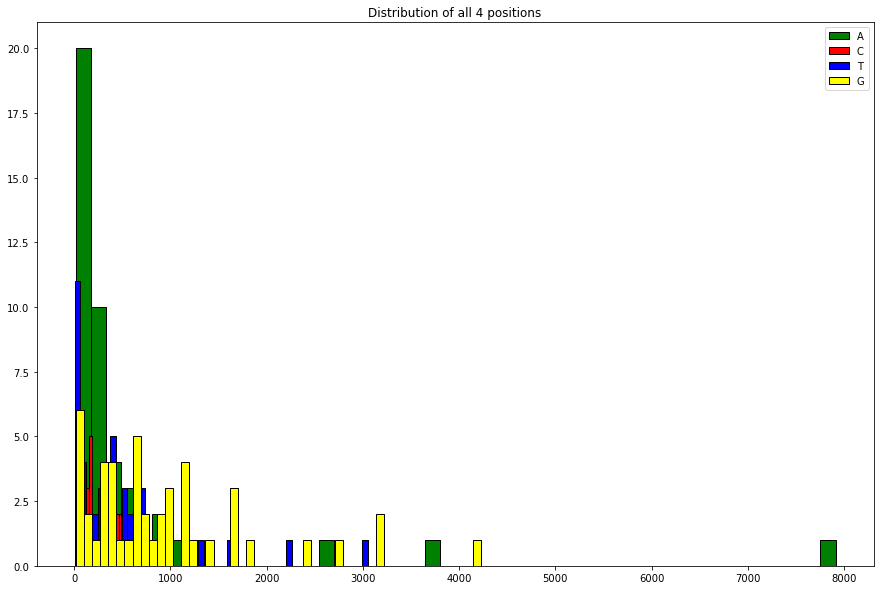

In [159]:
plt.figure(figsize=(15,10))
plt.hist(lstA, bins=50, color='green', label="A", edgecolor='black') # plotting histogram
plt.hist(lstC, bins=50, color='red', label="C", edgecolor='black')
plt.hist(lstT, bins=50, color='blue', label="T", edgecolor='black')
plt.hist(lstG, bins=50, color='yellow', label="G", edgecolor='black')
plt.title("Distribution of all 4 positions")
plt.legend()

# 2. Отбор необходимых данных 

In [125]:
train_part = c[c["matches"] > c["matches"].mean()] # где matches больше чем среднее

In [126]:
train_part = train_part[["pos", "reads_all", "mismatches", "deletions", "insertions"]] #selecting specific columns

In [128]:
train_part.to_csv('train_part.csv', index=False)

# 3. Сделать небольшой EDA

Moscow flat prices dataset: https://www.kaggle.com/hugoncosta/price-of-flats-in-moscow

In [129]:
flat_df=pd.read_csv('flats_moscow.csv')

In [130]:
flat_df.describe()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,1020.500000,127.496569,73.084314,46.337255,8.898529,11.015686,8.117157,0.685784,0.323039,0.790686,4.322059
std,589.041594,51.878220,15.123450,7.894348,2.787073,3.375539,3.815574,0.464317,0.467752,0.406918,2.183289
min,1.000000,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,510.750000,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000,3.000000
50%,1020.500000,115.000000,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000,4.000000
75%,1530.250000,142.000000,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000,6.000000
max,2040.000000,730.000000,192.000000,102.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000,8.000000


The dataset contains columns such as Price, Total Space of Apartment, Living Space, Kitchen space, Distance to center, Distance to Metro, brick or not, floor.

In [192]:
flat_df[flat_df["price"] < 100] # checking the apartments from lower range of prices

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
3,4,95,61,37,6.0,13.5,7,1,0,1,1
6,7,98,59,39,6.0,7.5,10,0,0,1,8
7,8,88,55,36,6.0,9.0,5,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...
2028,2029,95,64,45,7.0,17.0,5,1,0,1,2
2031,2032,97,63,44,7.0,11.5,5,1,0,0,6
2032,2033,97,72,43,10.0,12.7,10,0,0,1,5
2036,2037,95,60,43,6.0,9.0,5,0,0,1,4


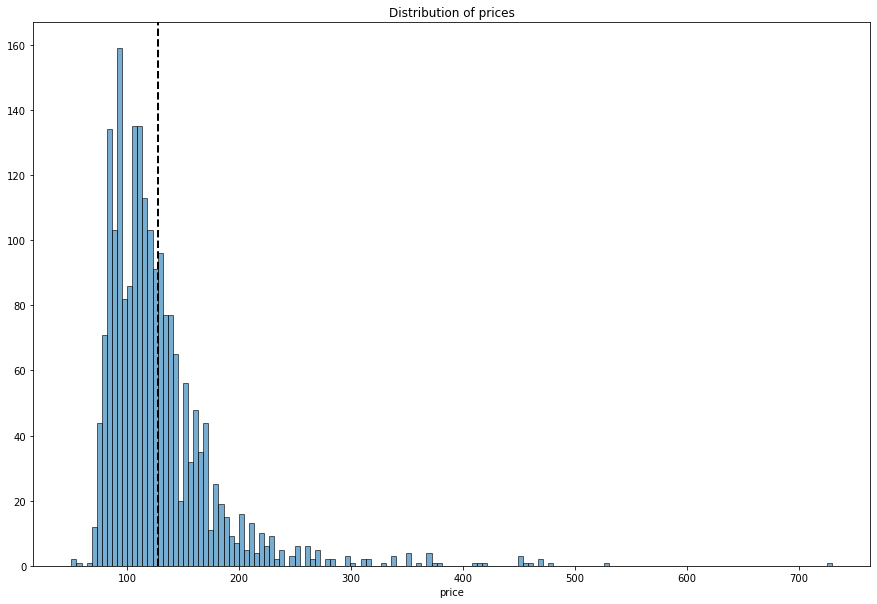

In [182]:
plt.figure(figsize=(15, 10))
plt.hist(flat_df["price"], bins=150, edgecolor='black', alpha=0.6)
plt.title("Distribution of prices")
plt.xlabel('price')
plt.axvline(flat_df["price"].mean(), color='k', linestyle='dashed', linewidth=2)

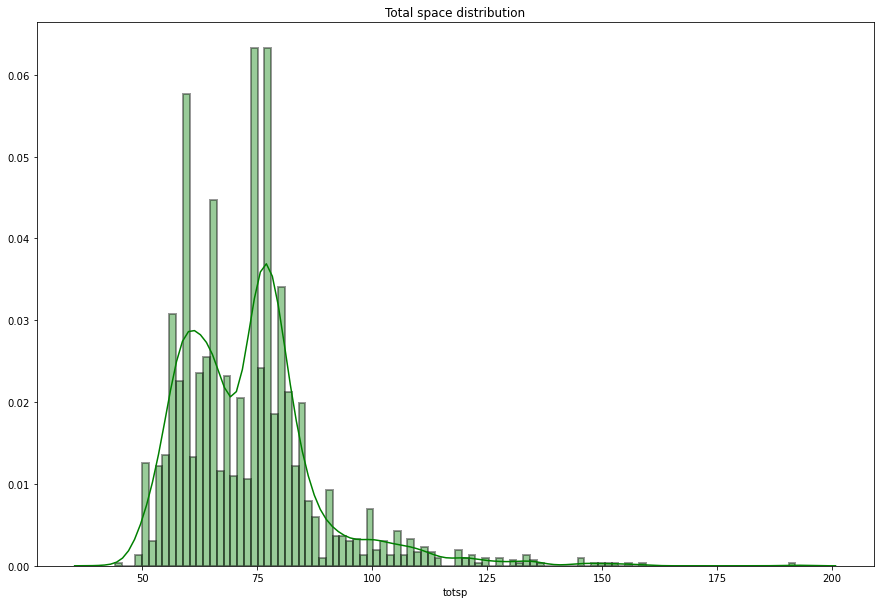

In [189]:
plt.figure(figsize=(15, 10))
plt.title("Total space distribution")
sns.distplot(flat_df['totsp'], color='g', bins=100, hist_kws=dict(edgecolor="black", linewidth=2));

Text(0.5, 1.0, 'Correlations')

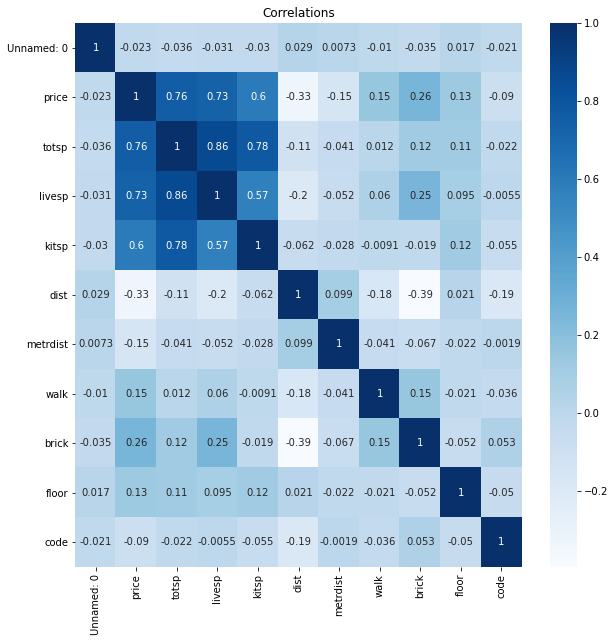

In [136]:
plt.figure(figsize=(10, 10))
sns.heatmap(flat_df.corr(), cbar=True, annot=True, cmap='Blues').set_title('Correlations')

Positive correlations with prices - total space, living space, kitchen space
Slight negative correlations - distance from center, distance from metro

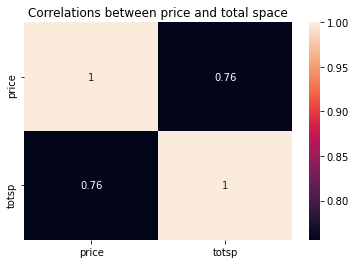

In [179]:
plt.title("Correlations between price and total space")
sns.heatmap(pd.DataFrame(flat_df,columns=['price','totsp']).corr(), annot=True)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


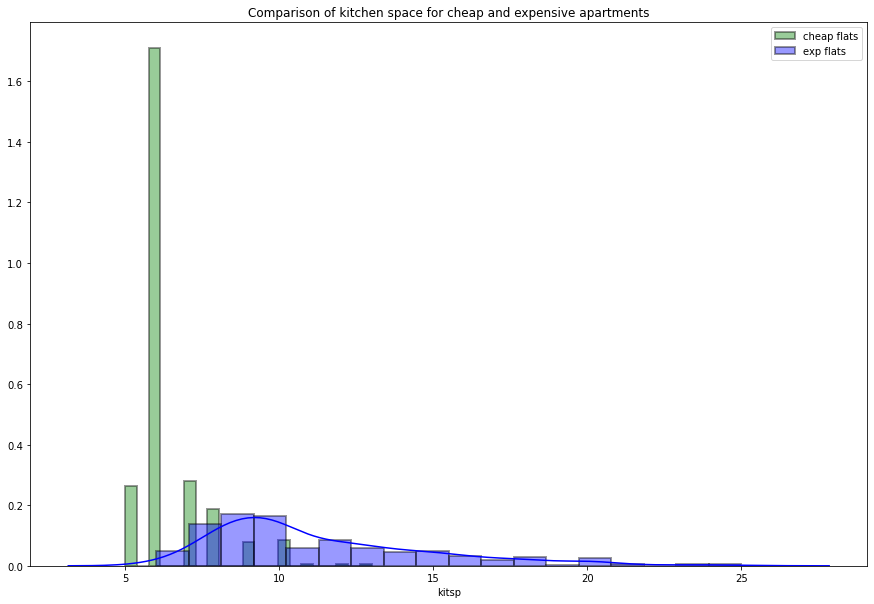

In [214]:
cheap_flats = flat_df[flat_df["price"] < 95] #459 flats
exp_flats = flat_df[flat_df["price"] > 150] #395 flats
plt.figure(figsize=(15,10))
plt.title("Comparison of kitchen space for cheap and expensive apartments")
sns.distplot(cheap_flats['kitsp'], color='g', hist_kws=dict(edgecolor="black", linewidth=2), label = "cheap flats");
sns.distplot(exp_flats['kitsp'], color='b', hist_kws=dict(edgecolor="black", linewidth=2), label = "exp flats");
plt.legend()

In [ ]:
As we see, cheaper flats have smaller kitchen spaces